#2º Tech Challange

#1 EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
#Avisos
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/Dados Históricos - Ibovespa_4anos.csv", sep=",")
df.head(25)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,18.08.2023,115.409,114.973,115.729,114.423,"10,60M","0,37%"
1,17.08.2023,114.982,115.592,116.610,114.859,"12,75M","-0,53%"
2,16.08.2023,115.592,116.171,117.338,115.534,"18,86M","-0,50%"
3,15.08.2023,116.171,116.809,117.697,116.033,"14,64M","-0,55%"
4,14.08.2023,116.810,118.067,118.082,116.530,"11,20M","-1,06%"
5,11.08.2023,118.065,118.350,119.054,117.415,"11,87M","-0,24%"
6,10.08.2023,118.350,118.412,119.438,118.113,"12,69M","-0,05%"
7,09.08.2023,118.409,119.090,119.090,117.901,"11,25M","-0,57%"
8,08.08.2023,119.090,119.378,119.553,117.492,"10,25M","-0,24%"
9,07.08.2023,119.380,119.509,120.104,118.894,"8,73M","-0,11%"


Utilizamos a biblioteca "datetime" para a conversão da data de object para datetime corretamente. No outro formato estava convertanto uma parte dos dados para Ano/Mês/Dia e a outra parte para Ano/Dia/Mês.

In [ ]:
from datetime import datetime
def converterData(data):
  return datetime.strptime(data,'%d.%m.%Y')

In [ ]:
df.head(25)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,18.08.2023,115.409,114.973,115.729,114.423,"10,60M","0,37%"
1,17.08.2023,114.982,115.592,116.610,114.859,"12,75M","-0,53%"
2,16.08.2023,115.592,116.171,117.338,115.534,"18,86M","-0,50%"
3,15.08.2023,116.171,116.809,117.697,116.033,"14,64M","-0,55%"
4,14.08.2023,116.810,118.067,118.082,116.530,"11,20M","-1,06%"
5,11.08.2023,118.065,118.350,119.054,117.415,"11,87M","-0,24%"
6,10.08.2023,118.350,118.412,119.438,118.113,"12,69M","-0,05%"
7,09.08.2023,118.409,119.090,119.090,117.901,"11,25M","-0,57%"
8,08.08.2023,119.090,119.378,119.553,117.492,"10,25M","-0,24%"
9,07.08.2023,119.380,119.509,120.104,118.894,"8,73M","-0,11%"


In [ ]:
df['Data'] = df['Data'].apply(converterData)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1153 entries, 0 to 1152
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      1153 non-null   datetime64[ns]
 1   Último    1153 non-null   float64       
 2   Abertura  1153 non-null   float64       
 3   Máxima    1153 non-null   float64       
 4   Mínima    1153 non-null   float64       
 5   Vol.      1153 non-null   object        
 6   Var%      1153 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 63.2+ KB


In [ ]:
df.head(25)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2023-08-18,115.409,114.973,115.729,114.423,"10,60M","0,37%"
1,2023-08-17,114.982,115.592,116.610,114.859,"12,75M","-0,53%"
2,2023-08-16,115.592,116.171,117.338,115.534,"18,86M","-0,50%"
3,2023-08-15,116.171,116.809,117.697,116.033,"14,64M","-0,55%"
4,2023-08-14,116.810,118.067,118.082,116.530,"11,20M","-1,06%"
5,2023-08-11,118.065,118.350,119.054,117.415,"11,87M","-0,24%"
6,2023-08-10,118.350,118.412,119.438,118.113,"12,69M","-0,05%"
7,2023-08-09,118.409,119.090,119.090,117.901,"11,25M","-0,57%"
8,2023-08-08,119.090,119.378,119.553,117.492,"10,25M","-0,24%"
9,2023-08-07,119.380,119.509,120.104,118.894,"8,73M","-0,11%"


In [ ]:
df = df.rename(columns={"Vol.":"Vol", "Var%":"Var", "Mínima": "Minima", "Máxima": "Maxima", "Último":"Fechamento"})

Percebemosd um valor no ano de 2019 que representava mil com um K ao invés de Milhões com o M. Fizemos a multiplicação para melhor visualizar o dado na coluna Volume.

In [ ]:
def convert_to_float(value):
    if "M" in value:
        return float(value.replace("M", "").replace(",", ".")) * 1000000
    elif "K" in value:
        return float(value.replace("K", "").replace(",", ".")) * 1000
    else:
        return float(value.replace(",", "."))

df["Vol"] = df["Vol"].apply(convert_to_float)

print(df)

           Data  Fechamento  Abertura   Maxima   Minima         Vol     Var
0    2023-08-18     115.409   114.973  115.729  114.423  10600000.0   0,37%
1    2023-08-17     114.982   115.592  116.610  114.859  12750000.0  -0,53%
2    2023-08-16     115.592   116.171  117.338  115.534  18860000.0  -0,50%
3    2023-08-15     116.171   116.809  117.697  116.033  14640000.0  -0,55%
4    2023-08-14     116.810   118.067  118.082  116.530  11200000.0  -1,06%
...         ...         ...       ...      ...      ...         ...     ...
1148 2019-01-08      92.032    91.699   92.231   91.064   4640000.0   0,36%
1149 2019-01-07      91.699    91.845   92.552   91.288   4710000.0  -0,15%
1150 2019-01-04      91.841    91.577   92.701   90.824   5490000.0   0,30%
1151 2019-01-03      91.564    91.011   91.596   89.922   6250000.0   0,61%
1152 2019-01-02      91.012    87.887   91.479   87.536   5790000.0   3,56%

[1153 rows x 7 columns]


In [ ]:
def convert_to_floats(value):
    return float(value.replace("%", "").replace(",", "."))

df["Var"] = df["Var"].apply(convert_to_floats)

print(df)

           Data  Fechamento  Abertura   Maxima   Minima         Vol   Var
0    2023-08-18     115.409   114.973  115.729  114.423  10600000.0  0.37
1    2023-08-17     114.982   115.592  116.610  114.859  12750000.0 -0.53
2    2023-08-16     115.592   116.171  117.338  115.534  18860000.0 -0.50
3    2023-08-15     116.171   116.809  117.697  116.033  14640000.0 -0.55
4    2023-08-14     116.810   118.067  118.082  116.530  11200000.0 -1.06
...         ...         ...       ...      ...      ...         ...   ...
1148 2019-01-08      92.032    91.699   92.231   91.064   4640000.0  0.36
1149 2019-01-07      91.699    91.845   92.552   91.288   4710000.0 -0.15
1150 2019-01-04      91.841    91.577   92.701   90.824   5490000.0  0.30
1151 2019-01-03      91.564    91.011   91.596   89.922   6250000.0  0.61
1152 2019-01-02      91.012    87.887   91.479   87.536   5790000.0  3.56

[1153 rows x 7 columns]


In [ ]:
df.describe()

,Fechamento,Abertura,Maxima,Minima,Vol,Var
count,1153.000000,1153.000000,1153.000000,1153.000000,1.153000e+03,1153.000000
mean,107.048034,107.024967,108.057820,105.992696,9.829215e+06,0.038309
std,10.954091,10.965904,10.771892,11.106725,3.823877e+06,1.705088
min,63.570000,63.604000,67.604000,61.691000,4.243200e+05,-14.780000
25%,100.553000,100.553000,101.560000,99.630000,6.800000e+06,-0.760000
50%,107.629000,107.582000,108.602000,106.624000,9.990000e+06,0.070000
75%,115.121000,115.093000,115.863000,113.945000,1.232000e+07,0.930000
max,130.776000,130.776000,131.190000,129.526000,2.603000e+07,13.910000


In [ ]:
df = df.sort_values(by='Data')

In [ ]:
df.head()

,Data,Fechamento,Abertura,Maxima,Minima,Vol,Var
1152,2019-01-02,91.012,87.887,91.479,87.536,5790000.0,3.56
1151,2019-01-03,91.564,91.011,91.596,89.922,6250000.0,0.61
1150,2019-01-04,91.841,91.577,92.701,90.824,5490000.0,0.30
1149,2019-01-07,91.699,91.845,92.552,91.288,4710000.0,-0.15
1148,2019-01-08,92.032,91.699,92.231,91.064,4640000.0,0.36


In [ ]:
df.set_index('Data', inplace=True)

In [ ]:
df.head()

,Fechamento,Abertura,Maxima,Minima,Vol,Var
Data,,,,,,
2019-01-02,91.012,87.887,91.479,87.536,5790000.0,3.56
2019-01-03,91.564,91.011,91.596,89.922,6250000.0,0.61
2019-01-04,91.841,91.577,92.701,90.824,5490000.0,0.30
2019-01-07,91.699,91.845,92.552,91.288,4710000.0,-0.15
2019-01-08,92.032,91.699,92.231,91.064,4640000.0,0.36


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1153 entries, 2019-01-02 to 2023-08-18
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Fechamento  1153 non-null   float64
 1   Abertura    1153 non-null   float64
 2   Maxima      1153 non-null   float64
 3   Minima      1153 non-null   float64
 4   Vol         1153 non-null   float64
 5   Var         1153 non-null   float64
dtypes: float64(6)
memory usage: 63.1 KB


In [ ]:
df.isnull().sum()

Fechamento    0
Abertura      0
Maxima        0
Minima        0
Vol           0
Var           0
dtype: int64

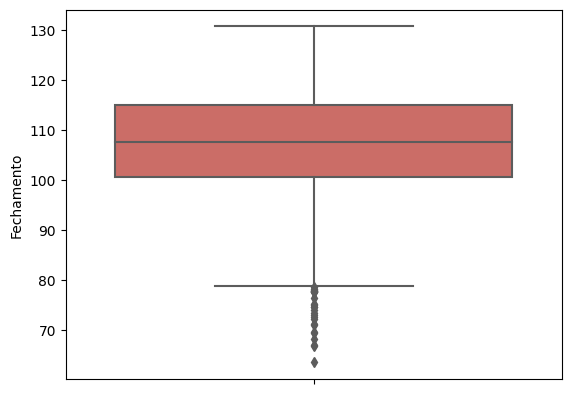

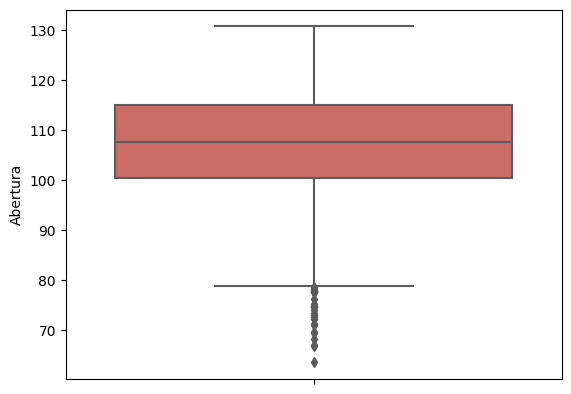

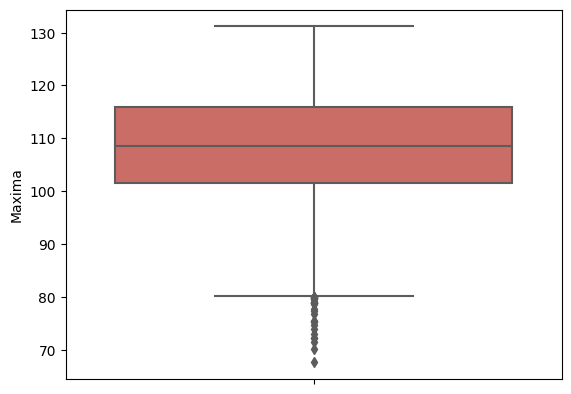

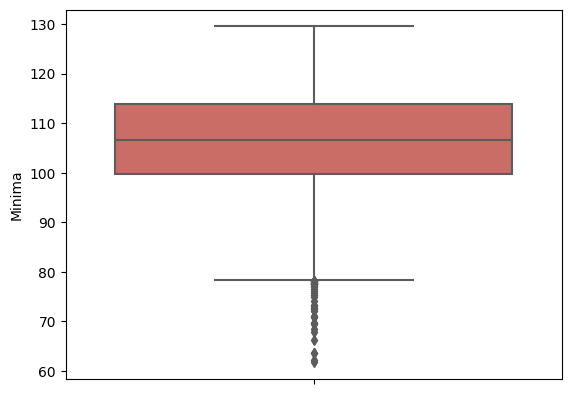

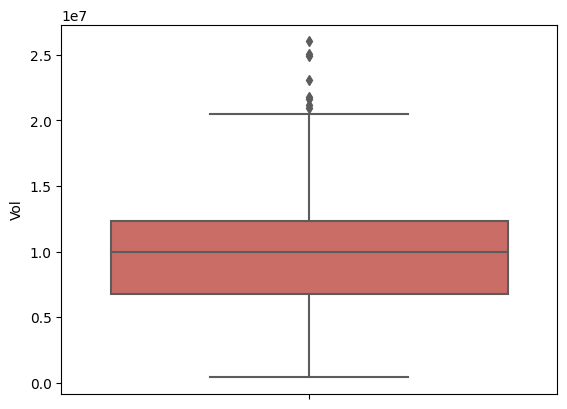

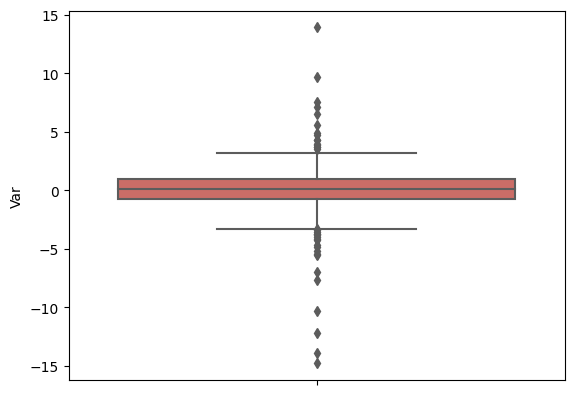

In [ ]:
sns.boxplot(y="Fechamento", data=df, palette="hls")
plt.show()
sns.boxplot(y="Abertura", data=df, palette="hls")
plt.show()
sns.boxplot(y="Maxima", data=df, palette="hls")
plt.show()
sns.boxplot(y="Minima", data=df, palette="hls")
plt.show()
sns.boxplot(y="Vol", data=df, palette="hls")
plt.show()
sns.boxplot(y="Var", data=df, palette="hls")
plt.show()

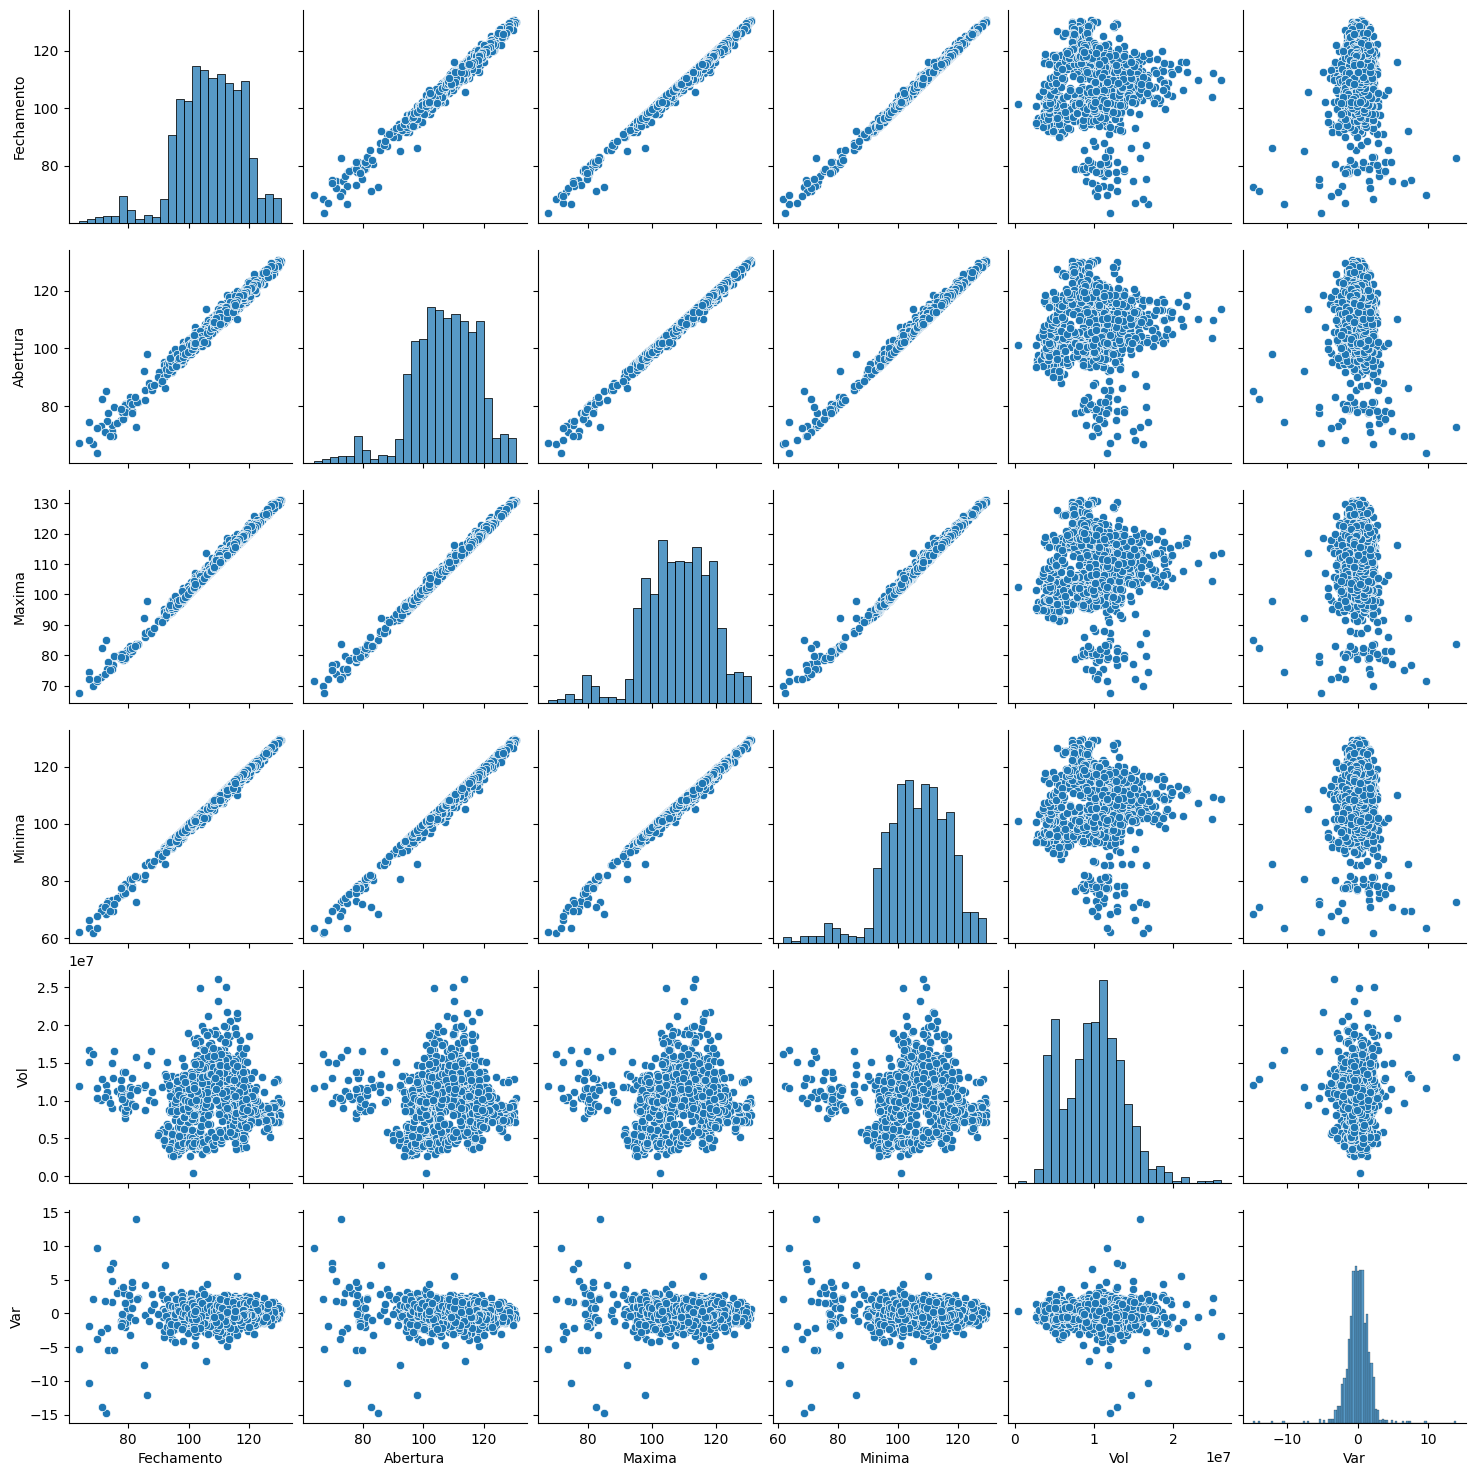

In [ ]:
sns.pairplot(df, vars=['Fechamento','Abertura','Maxima','Minima','Vol', "Var"])

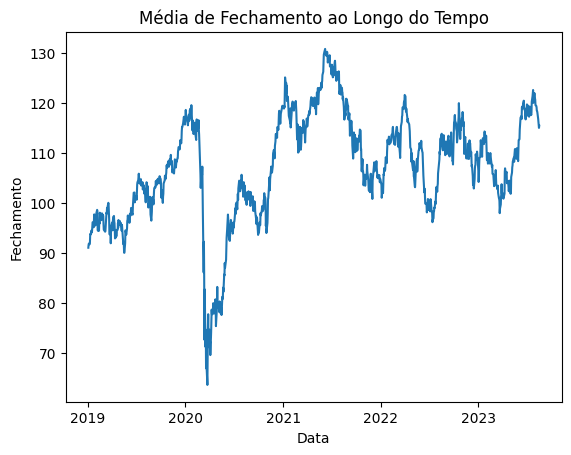

In [ ]:
plt.plot(df.index, df["Fechamento"])
plt.xlabel("Data")
plt.ylabel("Fechamento")
plt.title("Média de Fechamento ao Longo do Tempo")
plt.show()

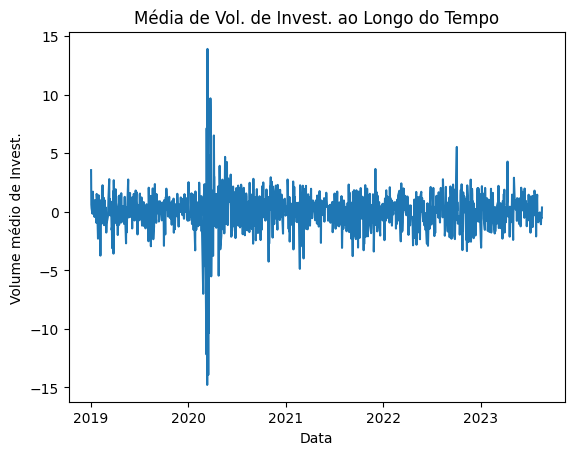

In [ ]:
plt.plot(df.index, df["Var"])
plt.xlabel("Data")
plt.ylabel("Volume médio de Invest.")
plt.title("Média de Vol. de Invest. ao Longo do Tempo")
plt.show()

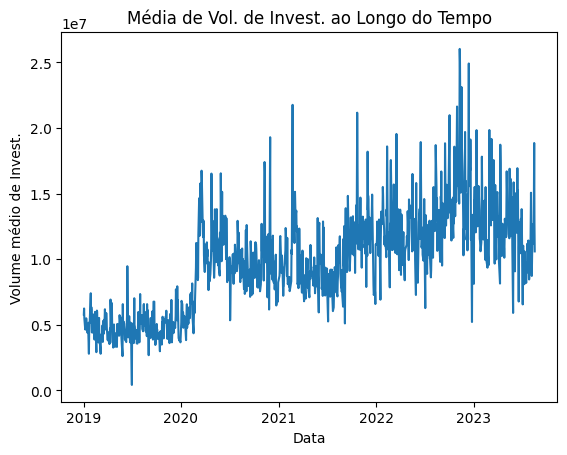

In [ ]:
plt.plot(df.index, df["Vol"])
plt.xlabel("Data")
plt.ylabel("Volume médio de Invest.")
plt.title("Média de Vol. de Invest. ao Longo do Tempo")
plt.show()

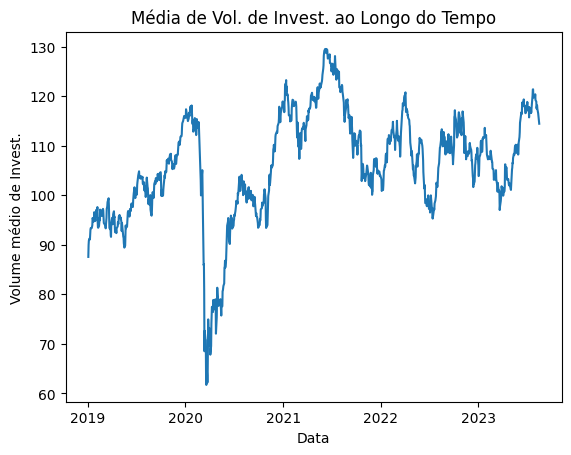

In [ ]:
plt.plot(df.index, df["Minima"])
plt.xlabel("Data")
plt.ylabel("Volume médio de Invest.")
plt.title("Média de Vol. de Invest. ao Longo do Tempo")
plt.show()

<Axes: >

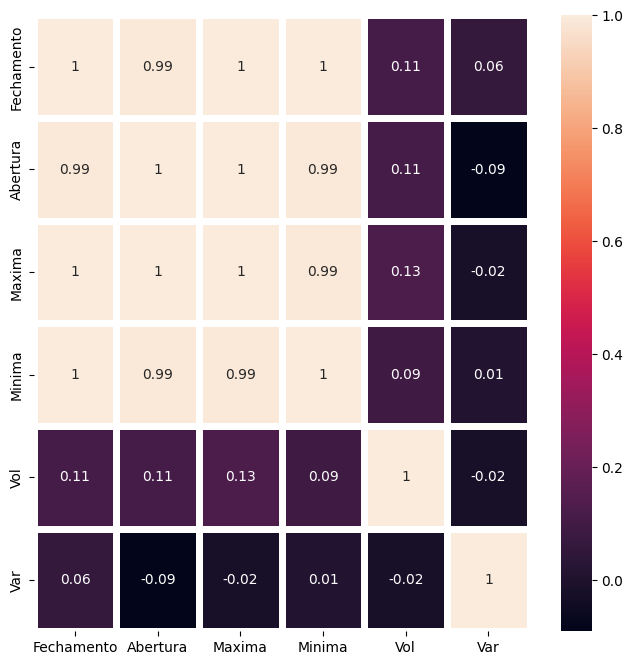

In [ ]:
correlation_matriz = df.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data = correlation_matriz, annot=True, linewidths=5, ax=ax)

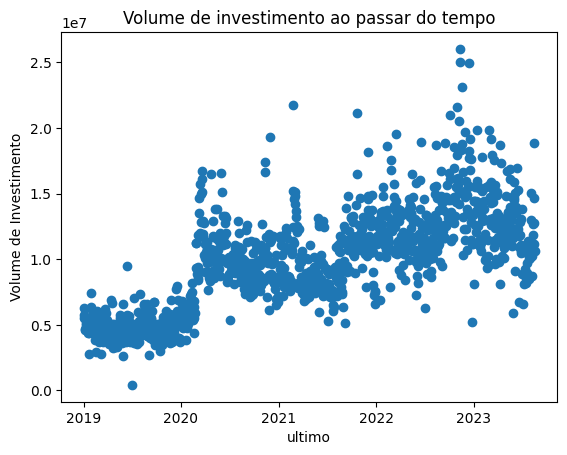

In [ ]:
plt.scatter(df.index, df["Vol"])
plt.xlabel("ultimo")
plt.ylabel("Volume de Investimento")
plt.title("Volume de investimento ao passar do tempo")
plt.show()

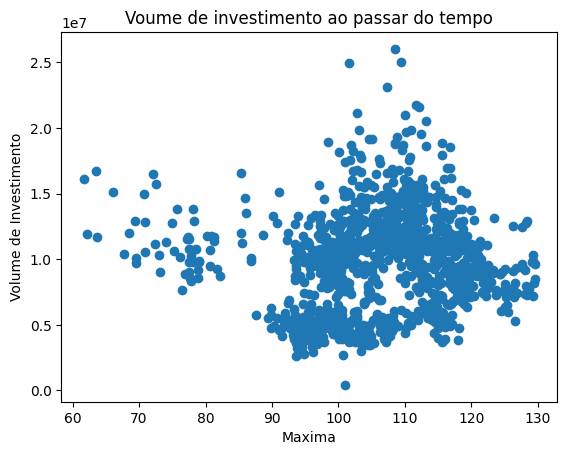

In [ ]:
plt.scatter(df["Minima"], df["Vol"])
plt.xlabel("Maxima")
plt.ylabel("Volume de Investimento")
plt.title("Voume de investimento ao passar do tempo")
plt.show()

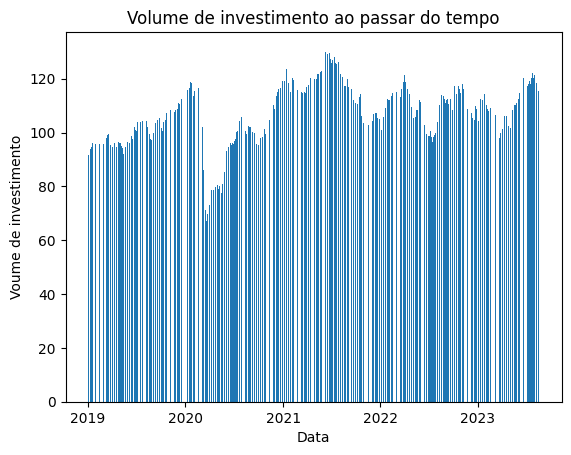

In [ ]:
plt.bar(df.index, df["Fechamento"])
plt.xlabel("Data")
plt.ylabel("Voume de investimento")
plt.title("Volume de investimento ao passar do tempo")
plt.show()

In [ ]:
print("Data Inicial:", df.index.min())

Data Inicial: 2019-01-02 00:00:00


In [ ]:
print("Data Final:", df.index.max())

Data Final: 2023-08-18 00:00:00


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf

# 2 Seasonal Decompose
#*Tendência - Direção
#*Sazonalidade - Recorrência das oscilações
#*Resíduo - O que sobra do sinal

In [ ]:
dec_Vol = seasonal_decompose(df['Fechamento'], period=7)

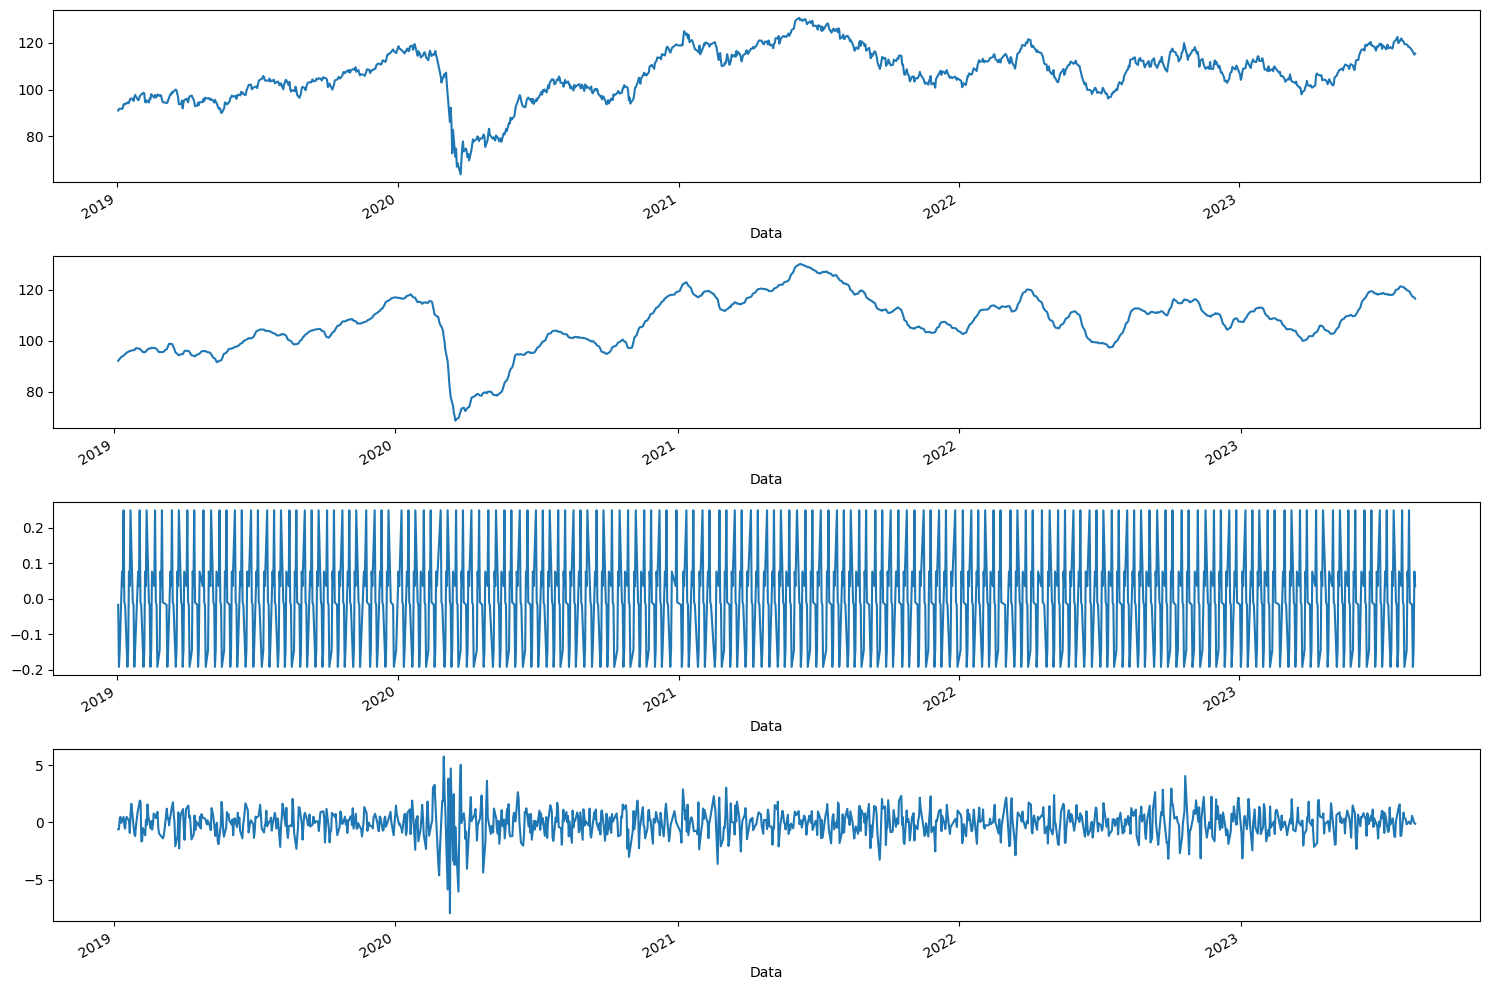

In [ ]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,10))
dec_Vol.observed.plot(ax=ax1)
dec_Vol.trend.plot(ax=ax2)
dec_Vol.seasonal.plot(ax=ax3)
dec_Vol.resid.plot(ax=ax4)
plt.tight_layout()

In [ ]:
dec_Max = seasonal_decompose(df['Maxima'], period=7)

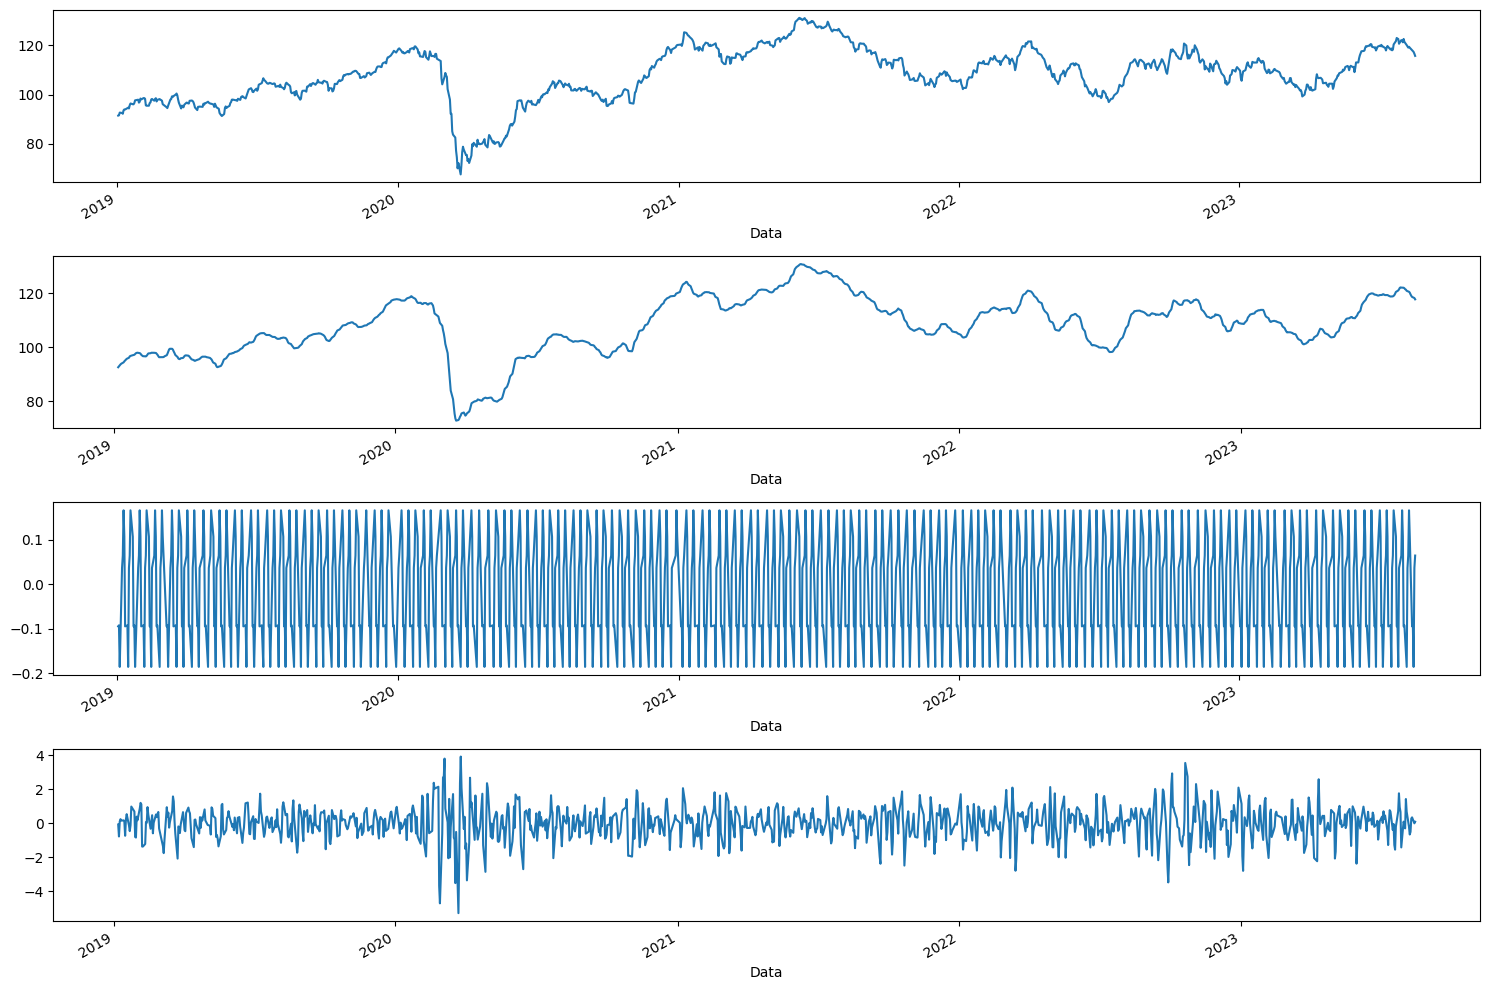

In [ ]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,10))
dec_Max.observed.plot(ax=ax1)
dec_Max.trend.plot(ax=ax2)
dec_Max.seasonal.plot(ax=ax3)
dec_Max.resid.plot(ax=ax4)
plt.tight_layout()

#3 Intentificando Estacionária ou não Estacionária

## Teste ADF - (Augmented Dickey Fuller)

  H0 - Hipótese Nula (não Estacionária)
  
  H1 - Hipótese Alternativa (rejeição da hipótese nula)


p-value = 0.05 (5%) , então rejeitamos H0 com um nível de confiança de 95%

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
df_dickeyF=df.Fechamento.values

In [ ]:
R_dickeyF = adfuller(df_dickeyF)

print("teste ABF")
print(f"Teste Estatistico: {R_dickeyF[0]}")
print(f"p-value: {R_dickeyF[1]}")
print(f"Valores Críticos: ")

for key, value in R_dickeyF[4].items():
  print(f"\t{key}: {value}")

teste ABF
Teste Estatistico: -2.9172862455433477
p-value: 0.043374453534151876
Valores Críticos: 
	1%: -3.436079050499444
	5%: -2.8640697479399972
	10%: -2.5681169015905425


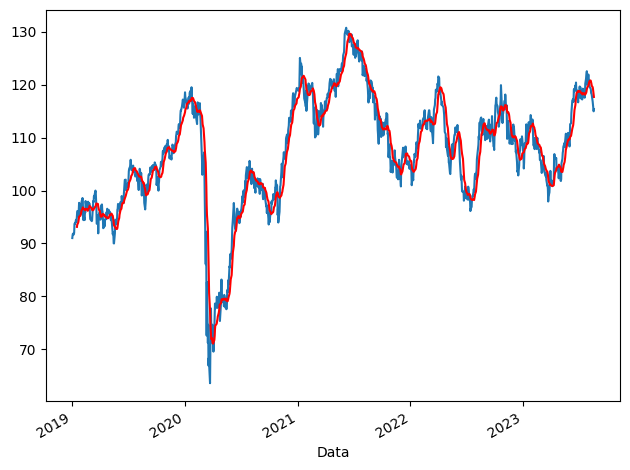

In [ ]:
df_rol = df["Fechamento"].rolling(12).mean()

f, ax = plt.subplots()
df["Fechamento"].plot(ax=ax, legend=False)
df_rol.plot(ax=ax, legend=False, color="r")
plt.tight_layout()

#4 Forecasting

In [ ]:
df_1=pd.read_csv("/content/Dados Históricos - Ibovespa_4anos.csv", sep=",")
df_1.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,18.08.2023,115.409,114.973,115.729,114.423,"10,60M","0,37%"
1,17.08.2023,114.982,115.592,116.610,114.859,"12,75M","-0,53%"
2,16.08.2023,115.592,116.171,117.338,115.534,"18,86M","-0,50%"
3,15.08.2023,116.171,116.809,117.697,116.033,"14,64M","-0,55%"
4,14.08.2023,116.810,118.067,118.082,116.530,"11,20M","-1,06%"


In [ ]:
def convert_to_float(value):
    if "M" in value:
        return float(value.replace("M", "").replace(",", ".")) * 10000
    elif "K" in value:
        return float(value.replace("K", "").replace(",", ".")) * 10
    else:
        return float(value.replace(",", "."))

df_1["Vol."] = df_1["Vol."].apply(convert_to_float)

print(df_1)

            Data   Último  Abertura   Máxima   Mínima      Vol.    Var%
0     18.08.2023  115.409   114.973  115.729  114.423  106000.0   0,37%
1     17.08.2023  114.982   115.592  116.610  114.859  127500.0  -0,53%
2     16.08.2023  115.592   116.171  117.338  115.534  188600.0  -0,50%
3     15.08.2023  116.171   116.809  117.697  116.033  146400.0  -0,55%
4     14.08.2023  116.810   118.067  118.082  116.530  112000.0  -1,06%
...          ...      ...       ...      ...      ...       ...     ...
1148  08.01.2019   92.032    91.699   92.231   91.064   46400.0   0,36%
1149  07.01.2019   91.699    91.845   92.552   91.288   47100.0  -0,15%
1150  04.01.2019   91.841    91.577   92.701   90.824   54900.0   0,30%
1151  03.01.2019   91.564    91.011   91.596   89.922   62500.0   0,61%
1152  02.01.2019   91.012    87.887   91.479   87.536   57900.0   3,56%

[1153 rows x 7 columns]


In [ ]:
df_1['Data'] = df_1['Data'].apply(converterData)

In [ ]:
df_1.describe()

,Último,Abertura,Máxima,Mínima,Vol.
count,1153.000000,1153.000000,1153.000000,1153.000000,1153.000000
mean,107.048034,107.024967,108.057820,105.992696,98292.145013
std,10.954091,10.965904,10.771892,11.106725,38238.770484
min,63.570000,63.604000,67.604000,61.691000,4243.200000
25%,100.553000,100.553000,101.560000,99.630000,68000.000000
50%,107.629000,107.582000,108.602000,106.624000,99900.000000
75%,115.121000,115.093000,115.863000,113.945000,123200.000000
max,130.776000,130.776000,131.190000,129.526000,260300.000000


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1153 entries, 0 to 1152
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      1153 non-null   datetime64[ns]
 1   Último    1153 non-null   float64       
 2   Abertura  1153 non-null   float64       
 3   Máxima    1153 non-null   float64       
 4   Mínima    1153 non-null   float64       
 5   Vol.      1153 non-null   float64       
 6   Var%      1153 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 63.2+ KB


In [ ]:
df_1.rename(columns={"Vol.": "Volume"}, inplace=True)

In [ ]:
df_1.head()

,Data,Último,Abertura,Máxima,Mínima,Volume,Var%
0,2023-08-18,115.409,114.973,115.729,114.423,106000.0,"0,37%"
1,2023-08-17,114.982,115.592,116.610,114.859,127500.0,"-0,53%"
2,2023-08-16,115.592,116.171,117.338,115.534,188600.0,"-0,50%"
3,2023-08-15,116.171,116.809,117.697,116.033,146400.0,"-0,55%"
4,2023-08-14,116.810,118.067,118.082,116.530,112000.0,"-1,06%"


In [ ]:
df_1 = df_1[["Data", "Último"]]
df_1 = df_1.rename(columns={"Data": "ds", "Último": "y"})

In [ ]:
#Função gera um DataFrame com o periodo desejado
def fazer_dataFrame_periodo(DtInicio,DtFim):
  df = pd.DataFrame({'ds': pd.date_range(start=DtInicio, end=DtFim)})
  df['y'] = pd.Series([None] * len(df))

  return df.sort_values('ds',ascending = True)

In [ ]:
df_faltantes = fazer_dataFrame_periodo(df_1['ds'].min(),df_1['ds'].max())

In [ ]:
#Codigo abaixo da o merge da nova tabela criada com a tabela original
df_1 = pd.merge(df_faltantes,df_1, on='ds', how='outer')
df_1.drop('y_x',axis = 1,inplace=True)
df_1.rename(columns={'y_y':'y'},inplace = True)
#o metodo ffill vai preencher os dados com o valor anterior mais proximo, então como todos os valores faltando são de feriados e fins de semana o valor na bolsa fica 'Congelado' dai utilizo o do dia anterior
df_1.fillna(method='ffill',inplace  = True)

In [ ]:
df_1

,ds,y
0,2019-01-02,91.012
1,2019-01-03,91.564
2,2019-01-04,91.841
3,2019-01-05,91.841
4,2019-01-06,91.841
...,...,...
1685,2023-08-14,116.810
1686,2023-08-15,116.171
1687,2023-08-16,115.592
1688,2023-08-17,114.982


In [ ]:
df_1.info()

In [ ]:
!pip install statsforecast

In [ ]:
df_1.tail()

,ds,y
1685,2023-08-14,116.810
1686,2023-08-15,116.171
1687,2023-08-16,115.592
1688,2023-08-17,114.982
1689,2023-08-18,115.409


In [ ]:
df_1["unique_id"] = "Ibovespa"

In [ ]:
df_1.head()

,ds,y,unique_id
0,2019-01-02,91.012,Ibovespa
1,2019-01-03,91.564,Ibovespa
2,2019-01-04,91.841,Ibovespa
3,2019-01-05,91.841,Ibovespa
4,2019-01-06,91.841,Ibovespa


In [ ]:
treino = df_1.loc[df_1["ds"]<"2022-10-01"]
valid = df_1.loc[(df_1["ds"]>="2022-10-01")&(df_1["ds"]<"2023-02-18")]
h = valid["ds"].nunique() #validação do período "valid" (3meses)

In [ ]:
treino.head()

,ds,y,unique_id
0,2019-01-02,91.012,Ibovespa
1,2019-01-03,91.564,Ibovespa
2,2019-01-04,91.841,Ibovespa
3,2019-01-05,91.841,Ibovespa
4,2019-01-06,91.841,Ibovespa


In [ ]:
h

140

In [ ]:
def wmape(y_true, y_pred):
  return np.abs(y_true-y_pred).sum()/np.abs(y_true).sum()

In [ ]:
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, SeasonalWindowAverage, AutoARIMA

WMAPE: 1.94%


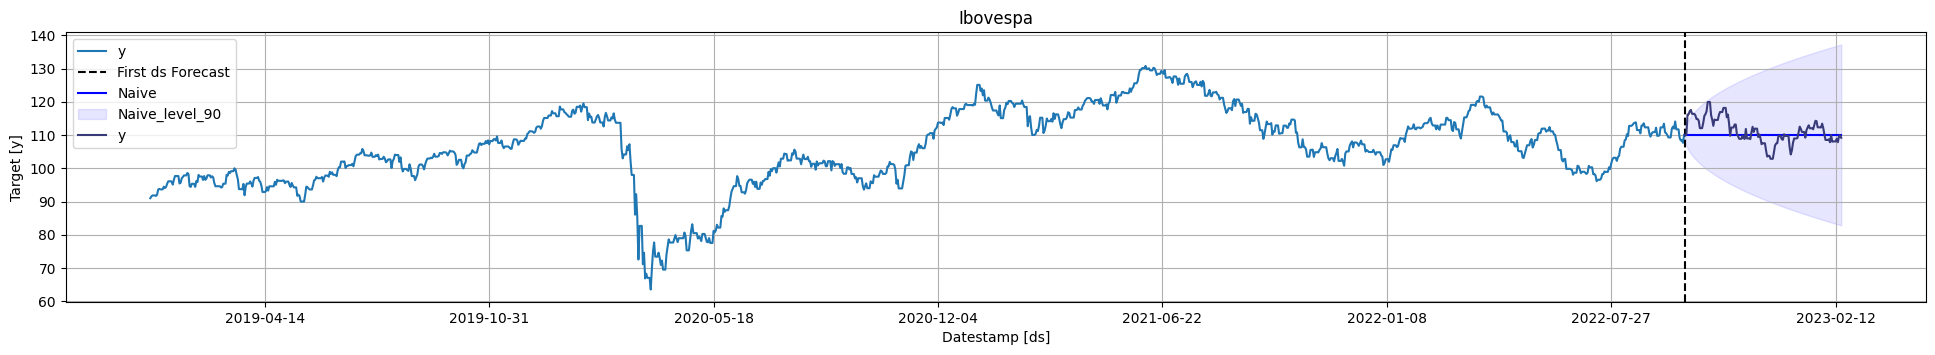

In [ ]:
model = StatsForecast(models=[Naive()], freq="D", n_jobs=-1)
model.fit(treino)

forecast_df = model.predict(h=h, level=[90])
forecast_df = forecast_df.reset_index().merge(valid, on=["ds", "unique_id"], how="left")

errors = abs(forecast_df["y"] - forecast_df["Naive"])
wmape_numerator = sum(errors) / sum(forecast_df["y"])
wmape = 100 * wmape_numerator / len(forecast_df["y"])
print(f"WMAPE: {wmape:.2%}")

model.plot(treino, forecast_df, level=[90], unique_ids=["Ibovespa"], engine="matplotlib")

Forecasting - testamos o modelo, mas apresentou uma predição estatica com um unico valor repetido formando uma linha reta.

#5 Scikt learn.

In [269]:
df.head()

,Fechamento,Abertura,Maxima,Minima,Vol,Var
Data,,,,,,
2019-01-02,91.012,87.887,91.479,87.536,5790000.0,3.56
2019-01-03,91.564,91.011,91.596,89.922,6250000.0,0.61
2019-01-04,91.841,91.577,92.701,90.824,5490000.0,0.30
2019-01-07,91.699,91.845,92.552,91.288,4710000.0,-0.15
2019-01-08,92.032,91.699,92.231,91.064,4640000.0,0.36


In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1153 entries, 2019-01-02 to 2023-08-18
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Fechamento  1153 non-null   float64
 1   Abertura    1153 non-null   float64
 2   Maxima      1153 non-null   float64
 3   Minima      1153 non-null   float64
 4   Vol         1153 non-null   float64
 5   Var         1153 non-null   float64
dtypes: float64(6)
memory usage: 63.1 KB


In [271]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [272]:
X = df.drop(columns=['Fechamento'])
y = df['Fechamento']

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realizar previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Avaliar a acurácia do modelo usando o coeficiente de determinação (R²)
acuracia = r2_score(y_test, y_pred)
print("Acurácia do Modelo (R²):", acuracia)

Acurácia do Modelo (R²): 0.9993643947067924


Scikt Learn - testamos o modelo que apresentou uma resultado muito proximo de 100% o que nos mostra um overfiting.

#6 stats Model

In [273]:
import pandas as pd
import statsmodels.api as sm

In [274]:
X = df.drop(columns=['Fechamento'])
y = df['Fechamento']

# Adicionar uma coluna de constante aos atributos (intercepto)
X = sm.add_constant(X)

# Dividir os dados em conjunto de treinamento e teste (opcional, depende do caso)
# Aqui você pode usar a mesma abordagem de divisão de dados que mencionamos anteriormente

# Criar o modelo de regressão
modelo = sm.OLS(y, X).fit()

# Obter as previsões do modelo
y_pred = modelo.predict(X)

# Calcular a acurácia (coeficiente de determinação R²)
acuracia = modelo.rsquared
print("Acurácia do Modelo (R²):", acuracia)

Acurácia do Modelo (R²): 0.9994118360282903


Stats Model - testamos o modelo que apresentou uma resultado muito proximo de 100% o que nos mostra um overfiting.

#7 PROPHET - (validação do modelo)
https://facebook.github.io/prophet/docs/quick_start.html#python-api

In [275]:
from prophet import Prophet

In [276]:
df_prof=pd.read_csv("/content/Dados Históricos - Ibovespa_4anos.csv", sep=",")
df_prof.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,18.08.2023,115.409,114.973,115.729,114.423,"10,60M","0,37%"
1,17.08.2023,114.982,115.592,116.610,114.859,"12,75M","-0,53%"
2,16.08.2023,115.592,116.171,117.338,115.534,"18,86M","-0,50%"
3,15.08.2023,116.171,116.809,117.697,116.033,"14,64M","-0,55%"
4,14.08.2023,116.810,118.067,118.082,116.530,"11,20M","-1,06%"


In [277]:
df_prof['Data'] = df_prof['Data'].apply(converterData)

In [278]:
df_prof = df_prof[['Data', 'Último']]
df_prof

,Data,Último
0,2023-08-18,115.409
1,2023-08-17,114.982
2,2023-08-16,115.592
3,2023-08-15,116.171
4,2023-08-14,116.810
...,...,...
1148,2019-01-08,92.032
1149,2019-01-07,91.699
1150,2019-01-04,91.841
1151,2019-01-03,91.564


In [279]:
df_prof.rename(columns={'Data': 'ds', "Último":"y"}, inplace=True)
df_prof

,ds,y
0,2023-08-18,115.409
1,2023-08-17,114.982
2,2023-08-16,115.592
3,2023-08-15,116.171
4,2023-08-14,116.810
...,...,...
1148,2019-01-08,92.032
1149,2019-01-07,91.699
1150,2019-01-04,91.841
1151,2019-01-03,91.564


In [280]:
df_prof1 = Prophet()
df_prof1.fit(df_prof)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpod_a13q1/q5bku_yd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpod_a13q1/abwd5jre.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60178', 'data', 'file=/tmp/tmpod_a13q1/q5bku_yd.json', 'init=/tmp/tmpod_a13q1/abwd5jre.json', 'output', 'file=/tmp/tmpod_a13q1/prophet_modeltgdq0h3g/prophet_model-20230830003208.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:32:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:32:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [281]:
future = df_prof1.make_future_dataframe(periods=1095)
future.tail()

,ds
2243,2026-08-13
2244,2026-08-14
2245,2026-08-15
2246,2026-08-16
2247,2026-08-17


In [282]:
forecast = df_prof1.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2243,2026-08-13,136.308227,-30.556191,296.562497
2244,2026-08-14,136.262414,-30.898129,297.236981
2245,2026-08-15,134.421828,-29.925652,296.709635
2246,2026-08-16,134.344683,-32.960936,294.910552
2247,2026-08-17,135.905309,-31.572817,300.278324


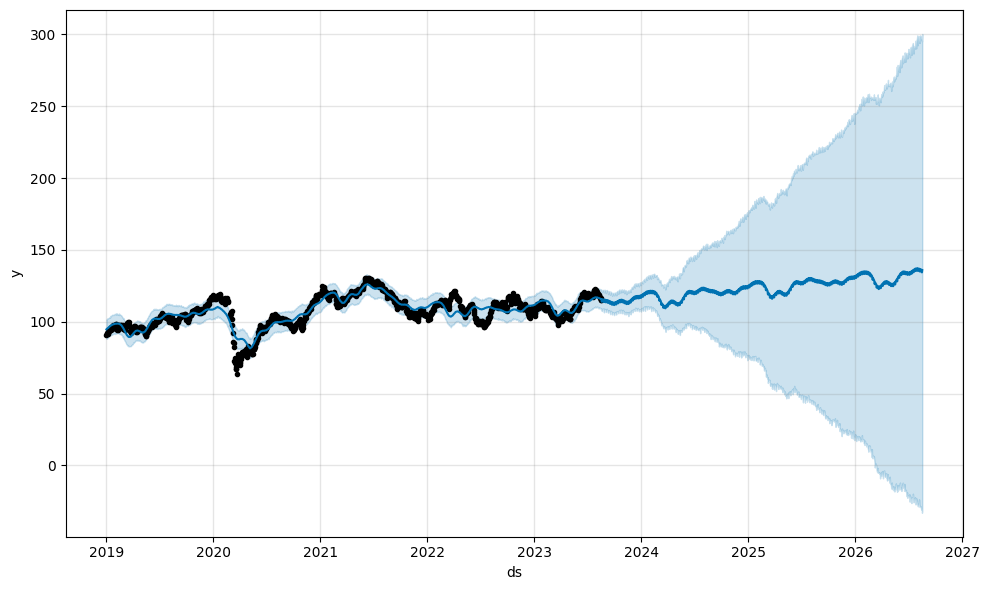

In [283]:
fig1 = df_prof1.plot(forecast)

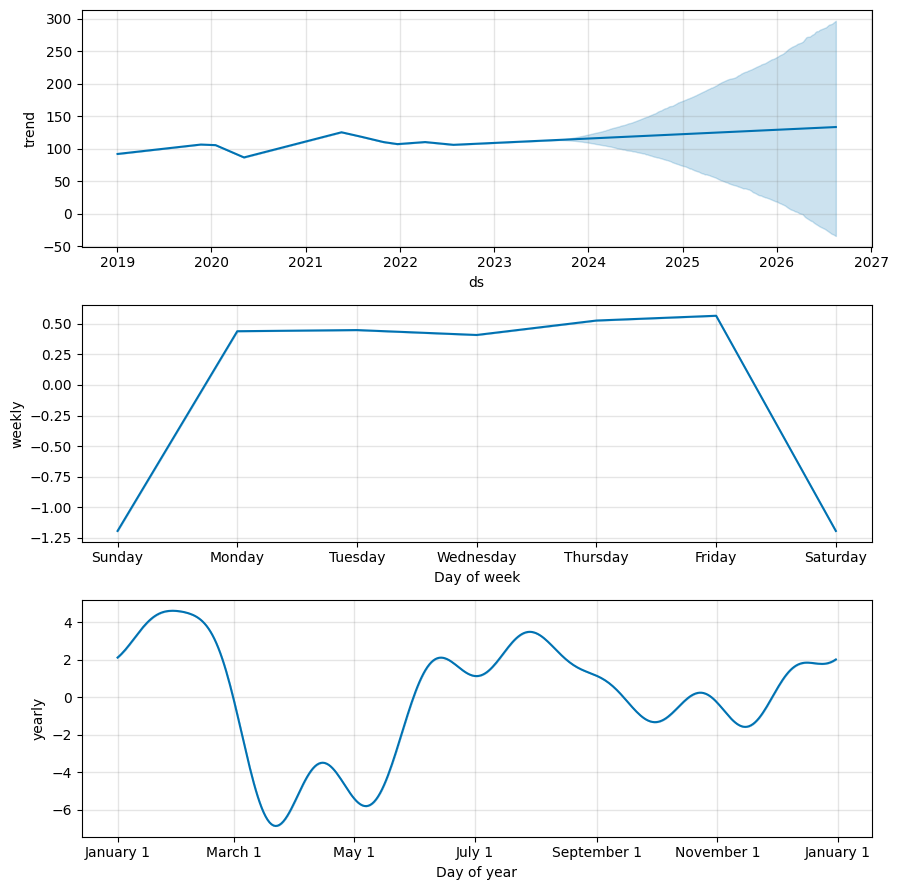

In [284]:
fig2 = df_prof1.plot_components(forecast)

In [285]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(df_prof1, forecast)

In [286]:
plot_components_plotly(df_prof1, forecast)

In [287]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

In [288]:
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation
df_cv = cross_validation(df_prof1, initial='395 days', period='180 days', horizon = '1000 days')

INFO:prophet:Making 2 forecasts with cutoffs between 2020-05-25 00:00:00 and 2020-11-21 00:00:00


  0%|          | 0/2 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpod_a13q1/2s8rtlg1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpod_a13q1/7d9czy_e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93541', 'data', 'file=/tmp/tmpod_a13q1/2s8rtlg1.json', 'init=/tmp/tmpod_a13q1/7d9czy_e.json', 'output', 'file=/tmp/tmpod_a13q1/prophet_model_favk1_5/prophet_model-20230830003213.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:32:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:32:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpod_a13q1/4iljl9g6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpod_a13q1/13dqetl6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [289]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-05-26,79.821979,75.798238,84.153316,85.469,2020-05-25
1,2020-05-27,79.950329,75.850752,84.053622,87.946,2020-05-25
2,2020-05-28,80.049838,75.620342,84.191599,86.949,2020-05-25
3,2020-05-29,80.064309,75.997747,84.160526,87.403,2020-05-25
4,2020-06-01,80.155848,75.668326,84.515675,88.620,2020-05-25


In [290]:
df_p = performance_metrics(df_cv)
df_p.head(25)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,101 days,173.276614,13.163458,12.520785,0.118292,0.118854,0.126752,0.000000
1,102 days,177.330542,13.316551,12.693024,0.119799,0.120265,0.128445,0.000000
2,103 days,180.449878,13.433163,12.804165,0.120713,0.121261,0.129491,0.000000
3,104 days,184.877361,13.596961,12.943150,0.121839,0.122309,0.130799,0.000000
4,106 days,185.934592,13.635784,12.994505,0.122334,0.123019,0.131350,0.000000
5,107 days,191.286683,13.830643,13.185712,0.124085,0.124498,0.133355,0.000000
6,108 days,196.480741,14.017159,13.353608,0.125547,0.125629,0.135053,0.000000
7,109 days,202.041208,14.214120,13.508146,0.126773,0.126428,0.136514,0.000000
8,110 days,209.002358,14.456914,13.681408,0.128178,0.126428,0.138216,0.000000
9,111 days,216.044589,14.698455,13.847974,0.129541,0.126715,0.139884,0.000000


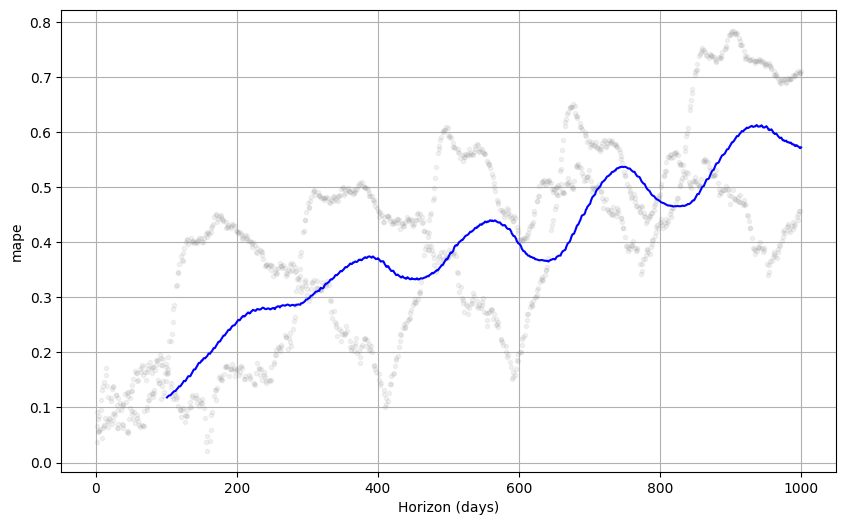

In [291]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

Prophet - Percebemos que o modelo ficou mais proximo da realizade quando fizemos a validação da predição. Porém poor ser um dado sensivel optamos por trabalharmos com uma variação menor para a predição. Por isso trazemos no proximo passo uma variação do prophet com uma predição de 7 dias.

#8 PROPHET - APERFEIÇOAMENTO DO MODELO

In [294]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn import metrics


#Avisos
import warnings
warnings.filterwarnings('ignore')

In [295]:
df=pd.read_csv("/content/Dados Históricos - Ibovespa_4anos.csv", sep=",")
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,18.08.2023,115.409,114.973,115.729,114.423,"10,60M","0,37%"
1,17.08.2023,114.982,115.592,116.610,114.859,"12,75M","-0,53%"
2,16.08.2023,115.592,116.171,117.338,115.534,"18,86M","-0,50%"
3,15.08.2023,116.171,116.809,117.697,116.033,"14,64M","-0,55%"
4,14.08.2023,116.810,118.067,118.082,116.530,"11,20M","-1,06%"


In [296]:
from datetime import datetime
def converterData(data):
  return datetime.strptime(data,'%d.%m.%Y')

In [297]:
df['Data'] = df['Data'].apply(converterData)

In [298]:
df = df[['Data','Último']]
df = df.rename(columns={'Data':'ds','Último':'y'})
df = df.sort_values('ds',ascending= True)

In [299]:
def run_prophet(train,periodo):
    prophet = Prophet()
    prophet.fit(train)

    future = prophet.make_future_dataframe(periodo, include_history=False, freq='D')
    p = prophet.predict(future)

    return p,prophet

In [300]:
#Testando previsão dos proximos 7 dias utilizando como janela os ultimos 60 dias
train = df.loc[(df["ds"]>='2023-06-11') & (df["ds"]<"2023-08-11")].sort_values('ds', ascending = True)
test  = df.loc[(df["ds"]>='2023-08-11') & (df["ds"] <= '2023-08-18')].sort_values('ds', ascending = True)

In [301]:
p,prophet = run_prophet(train,16)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpod_a13q1/5767gg3g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpod_a13q1/mcbldofa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74428', 'data', 'file=/tmp/tmpod_a13q1/5767gg3g.json', 'init=/tmp/tmpod_a13q1/mcbldofa.json', 'output', 'file=/tmp/tmpod_a13q1/prophet_modelq53czhsf/prophet_model-20230830003347.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:33:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:33:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [302]:
#Removendo as datas que não seram necessarias para validação,pois, trata-se de datas de fim de semana e ou feriados.
p = p[p['ds'].isin(test['ds'])]

In [303]:
p[['ds','yhat']].tail(5)

,ds,yhat
3,2023-08-14,118.395562
4,2023-08-15,117.814251
5,2023-08-16,117.887033
6,2023-08-17,117.406777
7,2023-08-18,117.281200


In [304]:
test.tail(5)

,ds,y
4,2023-08-14,116.810
3,2023-08-15,116.171
2,2023-08-16,115.592
1,2023-08-17,114.982
0,2023-08-18,115.409


In [305]:
print('MAE: {}'.format(metrics.mean_absolute_error(test['y'].values,p['yhat'].values)))
print('RMSE: {}'.format(metrics.mean_squared_error(test['y'].values,p['yhat'])))
print('MAPE: {}'.format(metrics.mean_absolute_percentage_error(test['y'].values,p['yhat'].values)))

MAE: 1.719331760291053
RMSE: 3.3518875771845678
MAPE: 0.014846368157960524


<Axes: xlabel='ds'>

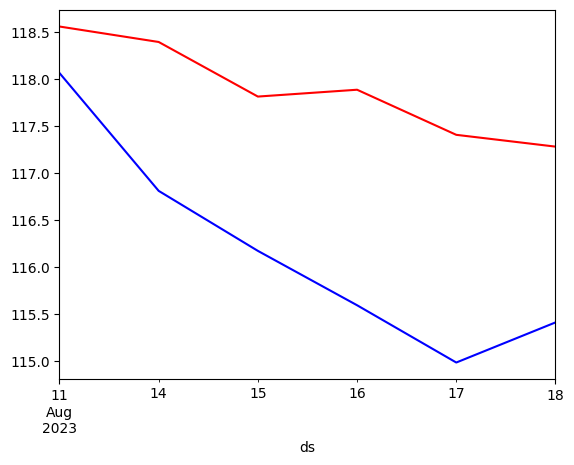

In [306]:
p.set_index("ds")['yhat'].plot(color='red')
test.set_index("ds")['y'].plot(color='blue')

In [307]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(prophet, p)

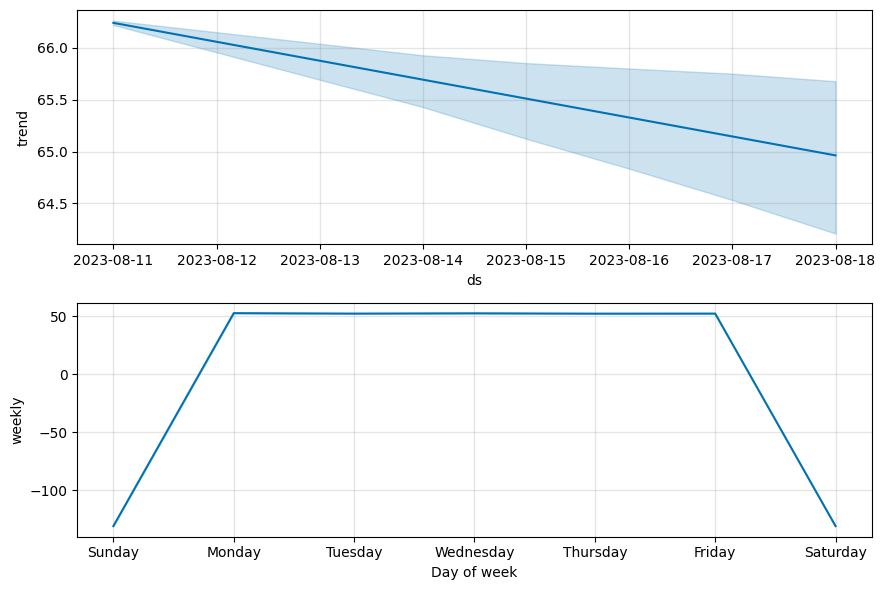

In [308]:
fig2 = prophet.plot_components(p)

#Ao analisarmos com uma predição de 7 dias nós percebemos um erro de 1.4% apenas no modelo. Então assim entendemos que o modelo prophet com uma predição de 7 dias é o melhor modelo analisado pelo grupo.